# Report example

This example shows how to generate a report out of the jupyter/jupyterlab notebook, using a customisable template.

In [1]:
# This cell's code and output will not be shown
from src.data.data import *
data = data_wrapper()

Loading configuration file from: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/src/config.yaml
Loaded configuration file
Loading devices data file from: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim
Data initialisation done


In [2]:
# This cell's code and output will not be shown

testname = "2018-09_EXT_BOLOGNA_TEST_WALL_MO"

# Set options below or use defaults from config.yaml 
options = {'clean_na': True, 
           'clean_na_method': 'drop'}

data.load_test(testname, options)

Loading test 2018-09_EXT_BOLOGNA_TEST_WALL_MO
Using options: {'clean_na': True, 'clean_na_method': 'drop'}
No cached info file
Loading device ARPAE_MO
No metadata found - skipping
Dropping NaN
Checking if units need to be converted
Converting CO from mg/m3 to ppm
Converting O3 from ug/m3 to ppb
Converting NO2 from ug/m3 to ppb
Converting NO from ug/m3 to ppb
No unit convertion needed for NOX. Actual channel name is not in look-up tables
Device ARPAE_MO has been loaded
Loading device SCK2
Found metadata
Dropping NaN
Renaming column GB_HUM to EXT_HUM
Renaming column GB_TEMP to EXT_TEMP
Renaming column PM_1 to EXT_PM_1
Renaming column PM_10 to EXT_PM_10
Renaming column PM_25 to EXT_PM_25
Device SCK2 has been loaded
Test loaded successfully


<Figure size 432x288 with 0 Axes>

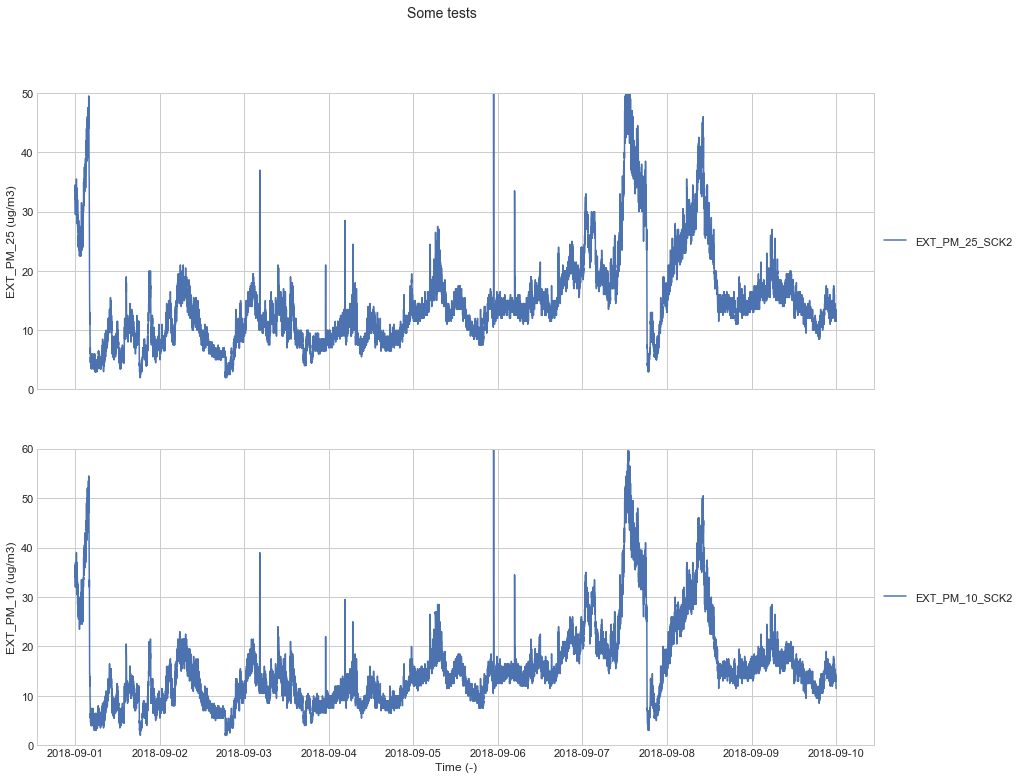

In [9]:
# This cell output will be shown, but not the code
from src.visualization.visualization import *
plot_description = {"plot_type": "timeseries",
                    "plotting_library": "matplotlib",
                    "data": {"test": testname,
                                    "traces": {"1": {"device": 'SCK2',
                                                    "channel" : "EXT_PM_25",
                                                    "subplot": 1},
                                              "2": {"device": 'SCK2',
                                                    "channel" : "EXT_PM_10",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '3Min',
                                "clean_na": True,
                                "clean_na_method": 'drop',
                                "max_date": '2018-09-10',
                                "min_date": '2018-09-01'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "EXT_PM_25 (ug/m3)", 2: "EXT_PM_10 (ug/m3)"},
                                   "yrange": {1: [0, 50], 2: [0, 60]},
                                   "title": "Some tests",
                                   "sharex":True,
                                   "grid": True,
                                   "height": 12,
                                   "width": 15,
                                   "style": "seaborn-whitegrid"}
                    }

plot_object = plot_wrapper(plot_description, verbose = False)
plot_object.plot(data)

## Conclusions

Some conclusions about our analysis in mkdown. Mark the cells to show only the output in the `Notebook tools` on the left side, by adding tags to the cell: `show_only_output`

In [2]:
import subprocess
import traceback


filename = 'EXAMPLE_REPORT'
print (f'Creating delivery report for {filename}')

subprocess.call(['jupyter', 'nbconvert', 'report.ipynb',
                 '--config', 'sc_nbconvert_config.py',  '--sc_Preprocessor.expression="show_only_output"',
                 '--to', 'html',  '--TemplateExporter.template_file=./templates/full_sc',
                 '--output-dir=../data/reports', f'--output={filename}.html'])

subprocess.call(['open', f'../data/reports/{filename}.html'])

Creating delivery report for EXAMPLE_REPORT


0